## Labb Covid19


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

### Exercise 1a

In [3]:
covid19_data = pd.read_excel("../Labb_1_databehandling/Folkhalsomyndigheten_Covid19.xlsx", "Veckodata Riket")
covid19_data.head()

rows, columns = covid19_data.shape
print(f"The dataframe has got {rows} rows and {columns} columns.")

covid19_data.info()
covid19_data.describe()
covid19_data.value_counts()

The dataframe has got 142 rows and 13 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    in

år    veckonummer  Antal_fall_vecka  Antal_fall_100000inv_vecka  Antal_fall_100000inv_14dagar  Kum_antal_fall  Kum_fall_100000inv  Antal_nyaintensivvårdade_vecka  Kum_antal_intensivvårdade  Antal_avlidna_vecka  Antal_avlidna_milj_inv_vecka  Kum_antal_avlidna  Kum_antal_avlidna_milj_inv
2020  6            1                 0                           0                             1               0                   0                               0                          0                    0.000000                      0                  0.000000                      1
2021  50           24485             236                         416                           1260348         12143               66                              8152                       49                   4.700000                      15259              1470.099976                   1
      44           5060              49                          106                           1178586         11355             

### Exercise 1b

In [4]:
covid19_data["Vecka"] = covid19_data["år"].astype(str) + "v" + covid19_data["veckonummer"].astype(str)

covid19_data.drop(columns="veckonummer", inplace=True)
covid19_data.drop(columns="år", inplace=True)

covid19_data.head()

,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv,Vecka
0,1,0,0,1,0,0,0,0,0.0,0,0.0,2020v6
1,0,0,0,1,0,0,0,0,0.0,0,0.0,2020v7
2,0,0,0,1,0,0,0,0,0.0,0,0.0,2020v8
3,13,0,0,14,0,0,0,0,0.0,0,0.0,2020v9
4,211,2,2,225,2,3,3,0,0.0,0,0.0,2020v10


### Exercise 1c

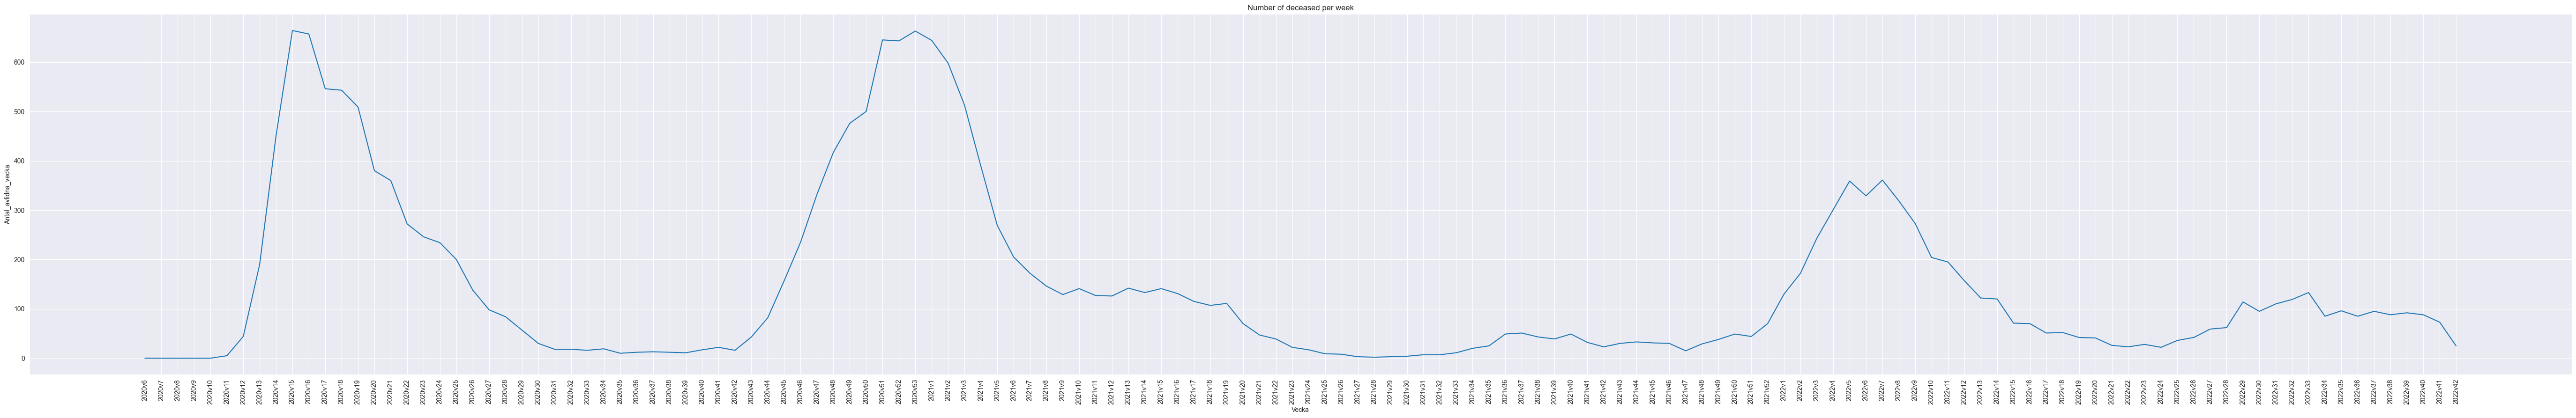

In [5]:

plt.figure(figsize=(70,10))
sns.set_style("darkgrid")
fig_1c = sns.lineplot(data=covid19_data, y="Antal_avlidna_vecka", x="Vecka").set(title='Number of deceased per week')
plt.xticks(rotation=90)
plt.show()

#plt.savefig("Visualiseringar/exercise_1c_seaborn.png")

In [6]:
fig_1c_plotly = px.line(covid19_data, x="Vecka", y="Antal_avlidna_vecka", title= "Number of deceased per week")
fig_1c_plotly.update_xaxes(title_text="year/week")
fig_1c_plotly.update_yaxes(title_text="number of deceased")
fig_1c_plotly.write_html("Visualiseringar/exercise_1c_plotly.html")
fig_1c_plotly

### Exercise 1d

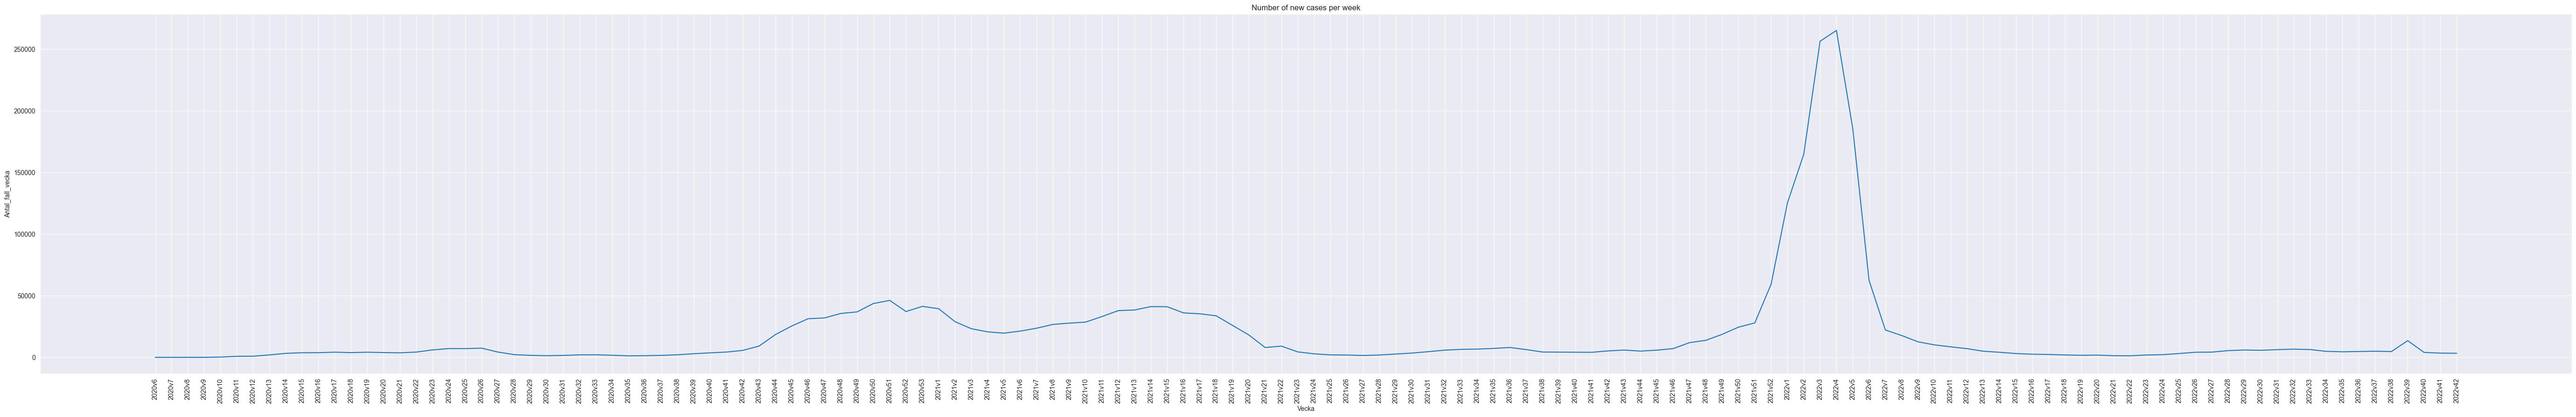

In [7]:
plt.figure(figsize=(70,10))
sns.lineplot(data=covid19_data, y="Antal_fall_vecka", x="Vecka").set(title='Number of new cases per week')
sns.set_style("darkgrid")
plt.xticks(rotation=90)
plt.show()

#plt.savefig("Visualiseringar/exercise_1d_seaborn.png")

In [8]:
fig_1d_plotly = px.line(covid19_data, x="Vecka", y="Antal_fall_vecka", title="Number of new cases per week")
fig_1d_plotly.update_xaxes(title_text="year/week")
fig_1d_plotly.update_yaxes(title_text="number of new cases")
fig_1d_plotly.write_html("Visualiseringar/exercise_1d_plotly.html")
fig_1d_plotly

### Exercise 1e

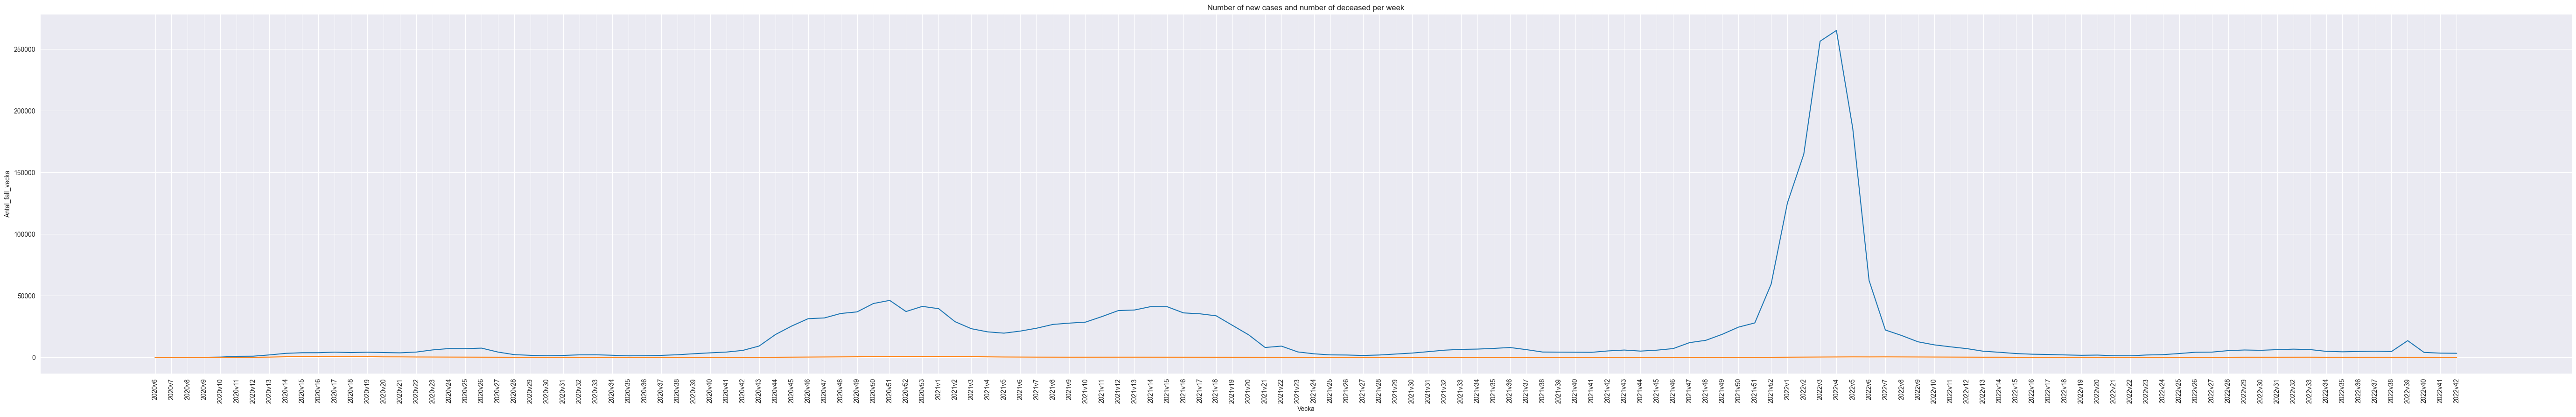

In [9]:
plt.figure(figsize=(70,10))
sns.lineplot(data=covid19_data, y="Antal_fall_vecka", x="Vecka").set(title='Number of new cases and number of deceased per week')
sns.lineplot(data=covid19_data, y="Antal_avlidna_vecka", x="Vecka")
sns.set_style("darkgrid")
plt.xticks(rotation=90)
plt.show()

#plt.savefig("Visualiseringar/exercise_1e_seaborn.png")

In [10]:
fig_1e_plotly = px.line(covid19_data, x= "Vecka", y=["Antal_avlidna_vecka", "Antal_fall_vecka"],title="Number of new cases and number of deceased per week" )
fig_1e_plotly.update_xaxes(title_text="year/week")
fig_1e_plotly.update_yaxes(title_text="")
fig_1e_plotly.write_html("Visualiseringar/exercise_1e_plotly.html")
fig_1e_plotly

### Exercise 1f

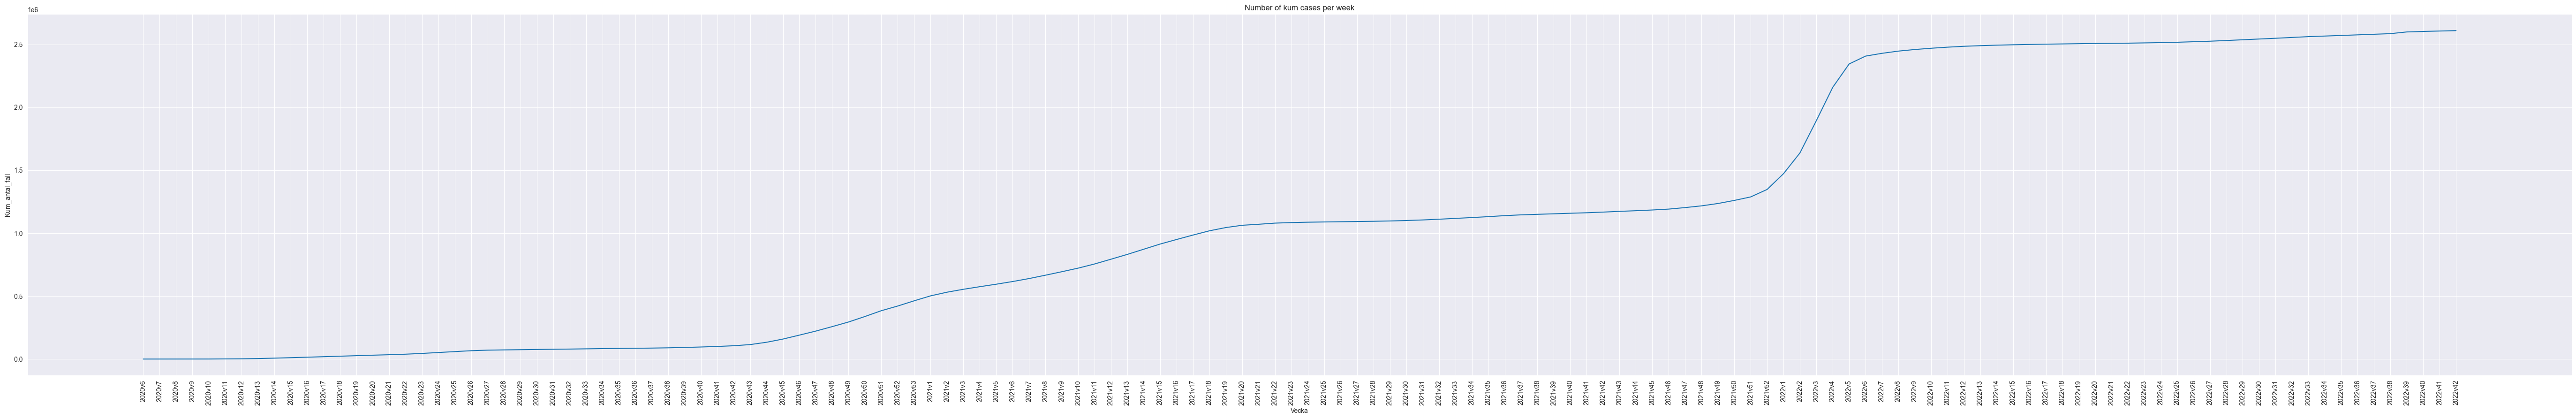

In [11]:
plt.figure(figsize=(70,10))
sns.lineplot(data=covid19_data, y="Kum_antal_fall", x="Vecka").set(title='Number of kum cases per week')
sns.set_style("darkgrid")
plt.xticks(rotation=90)
plt.show()

#plt.savefig("Visualiseringar/exercise_1c_seaborn.png")

In [12]:
fig_1f_plotly = px.line(covid19_data, x="Vecka", y="Kum_antal_fall")
fig_1f_plotly.write_html("Visualiseringar/exercise_1f_plotly.html")

### Exercise 2a

In [13]:
covid19_data_vaccine = pd.read_excel("../Labb_1_databehandling/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", "Vaccinerade kommun och ålder")

covid19_data_vaccine.head()

number_of_regions = covid19_data_vaccine["Län_namn"].value_counts()
print(f"The number of kommuner is {len(number_of_regions)}")

The number of kommuner is 21


### Exercise 2b

In [14]:
number_of_kommuner = covid19_data_vaccine["Kommun_namn"].value_counts()
number_of_kommuner
print(f"The number of kommuner is {len(number_of_kommuner)}")

The number of kommuner is 290


### Exercise 2c

In [15]:
population = covid19_data_vaccine["Befolkning"].sum()
print(f"The population is {population}")

The population is 9092790


### Exercise 2d

In [16]:
population_in_sweden = 10554692

filtered_rows = covid19_data_vaccine.query("Ålder == '12-15' or Ålder == '16-17'")

sum_people_under_18_dataset = filtered_rows["Befolkning"].sum()

under_18_sweden = population_in_sweden - sum_people_under_18_dataset

under_18_sweden

print(f"Based on the dataset there are {under_18_sweden} children under 18 in sweden.")


Based on the dataset there are 9809322 children under 18 in sweden.


### Exercise 2e

In [17]:
fig_2e_plotly = px.histogram(covid19_data_vaccine, y="Befolkning", x="Ålder", title="Number of people in Sweden divided into age-groups ")
fig_2e_plotly.update_xaxes(title_text="age-groups")
fig_2e_plotly.update_yaxes(title_text="population in sweden")
fig_2e_plotly.write_html("Visualiseringar/exercise_2e_plotly.html")
fig_2e_plotly

### Exercise 2f

In [166]:
grouped_doses_per_region = covid19_data_vaccine.groupby("Län_namn")[["Antal minst 1 dos","Antal minst 2 doser", "Antal 3 doser"]].sum()

grouped_doses_per_region["Totalt antalet doser per län"] = grouped_doses_per_region["Antal minst 1 dos"] + grouped_doses_per_region["Antal minst 2 doser"] + grouped_doses_per_region["Antal 3 doser"]

grouped_doses_per_region["Andel minst 1 dos"] = grouped_doses_per_region["Antal minst 1 dos"]/grouped_doses_per_region["Totalt antalet doser per län"] *100
grouped_doses_per_region["Andel 2 doser"] = grouped_doses_per_region["Antal minst 2 doser"]/grouped_doses_per_region["Totalt antalet doser per län"] *100
grouped_doses_per_region["Andel 3 doser"] = grouped_doses_per_region["Antal 3 doser"]/grouped_doses_per_region["Totalt antalet doser per län"] *100

doses_df = grouped_doses_per_region.reset_index()

doses_df

,Län_namn,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Totalt antalet doser per län,Andel minst 1 dos,Andel 2 doser,Andel 3 doser
0,Blekinge län,122500,120727,92259.0,335486.0,36.514191,35.985704,27.500104
1,Dalarnas län,221420,218009,164296.0,603725.0,36.675639,36.110646,27.213715
2,Gotlands län,48785,47930,37423.0,134138.0,36.369262,35.731858,27.898880
3,Gävleborgs län,220389,215267,159636.0,595292.0,37.021999,36.161581,26.816420
4,Hallands län,259143,255329,191997.0,706469.0,36.681440,36.141572,27.176989
5,Jämtlands län,102236,100525,73332.0,276093.0,37.029552,36.409833,26.560615
6,Jönköpings län,274960,270266,199488.0,744714.0,36.921556,36.291247,26.787196
7,Kalmar län,190931,188522,147192.0,526645.0,36.254213,35.796789,27.948998
8,Kronobergs län,149141,146494,103745.0,399380.0,37.343132,36.680355,25.976514
9,Norrbottens län,198514,195919,149293.0,543726.0,36.509933,36.032671,27.457396


In [151]:
fig_2f_plotly = px.histogram(doses_df, x="Län_namn", y=["Andel minst 1 dos", "Andel 2 doser", "Andel 3 doser"], title="Andel doser per län i procent")
fig_2f_plotly.update_xaxes(title_text="Län")
fig_2f_plotly.update_yaxes(title_text="")

fig_2f_plotly.write_html("Visualiseringar/exercise_2f_plotly.html")
fig_2f_plotly

fig_2f_plotly.update_layout(barmode='group')

### Exercise 2g

In [190]:
grouped_doses_per_region = covid19_data_vaccine.groupby("Län_namn")[["Antal minst 1 dos","Antal minst 2 doser", "Antal 3 doser", "Antal 4 doser"]].sum()

grouped_doses_per_region["Totalt antalet doser per län"] = grouped_doses_per_region["Antal minst 1 dos"] + grouped_doses_per_region["Antal minst 2 doser"] + grouped_doses_per_region["Antal 3 doser"] + grouped_doses_per_region["Antal 4 doser"]
grouped_doses_per_region["Andel minst 1 dos"] = grouped_doses_per_region["Antal minst 1 dos"]/grouped_doses_per_region["Totalt antalet doser per län"] *100
grouped_doses_per_region["Andel 2 doser"] = grouped_doses_per_region["Antal minst 2 doser"]/grouped_doses_per_region["Totalt antalet doser per län"] *100
grouped_doses_per_region["Andel 3 doser"] = grouped_doses_per_region["Antal 3 doser"]/grouped_doses_per_region["Totalt antalet doser per län"] *100
grouped_doses_per_region["Andel 4 doser"] = grouped_doses_per_region["Antal 4 doser"]/grouped_doses_per_region["Totalt antalet doser per län"] *100

doses_df = grouped_doses_per_region.reset_index()

stockholm_query= doses_df.query("Län_namn == 'Stockholms län'")
västra_götalands_query = doses_df.query("Län_namn == 'Västra Götalands län'")

two_region_df = pd.concat([stockholm_query, västra_götalands_query])



two_region_df

,Län_namn,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Totalt antalet doser per län,Andel minst 1 dos,Andel 2 doser,Andel 3 doser,Andel 4 doser
11,Stockholms län,1741130,1678031,1192864.0,236006.0,4848031.0,35.914168,34.612629,24.605123,4.868079
18,Västra Götalands län,1299275,1266642,882706.0,213347.0,3661970.0,35.480220,34.589087,24.104676,5.826017


In [194]:
fig_2g_plotly = px.histogram(two_region_df, x="Län_namn", y=["Andel minst 1 dos", "Andel 2 doser", "Andel 3 doser", "Andel 4 doser"], title="Andel doser för Stockholms län och Västra Götalans län i procent ")
fig_2g_plotly.update_xaxes(title_text="Län")
fig_2g_plotly.update_yaxes(title_text="")

fig_2g_plotly.write_html("Visualiseringar/exercise_2g_plotly.html")
fig_2g_plotly

fig_2g_plotly.update_layout(barmode='group')

### Exercise 3.1 
#### (Analysis 1)

In [141]:
covid19_hospital_care = pd.read_excel("../Labb_1_databehandling/Folkhalsomyndigheten_Covid19.xlsx", "Antal intensivvårdade per dag")

covid19_hospital_care.head(1)
covid19_hospital_care.tail(1)
covid19_hospital_care.info()

len(covid19_hospital_care.query("`Antal_intensivvårdade` > 0"))

covid19_hospital_care["Antal_intensivvårdade"].max()
covid19_hospital_care["Antal_intensivvårdade"].min()
covid19_hospital_care["Antal_intensivvårdade"].mean()

group_number_people_intense_care = covid19_hospital_care.groupby("Antal_intensivvårdade")
covid19_hospital_care.loc[group_number_people_intense_care.groups[49]]

over_25_cases = covid19_hospital_care.query("`Antal_intensivvårdade` > 25")
len(over_25_cases)

equal_or_over_45_cases = covid19_hospital_care.query("`Antal_intensivvårdade` >= 45")
len(equal_or_over_45_cases)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Datum_vårdstart        965 non-null    datetime64[ns]
 1   Antal_intensivvårdade  965 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.2 KB


7

#### **Initial datanalysis**

This dataset shows how many people that got cared for in the intensive care unit from 2020-03-06 to 2022-10-26, a total of 965 days.

You can state following things on the overview of the data: 
- The number of days that at least one person cared for in the intensive care unit is 888.
- The maximum number of patients in one day that´s being cared for in the intensive care unit is 49 and it was in 2020-04-22 and the minimum is 0.
- The mean value of the number of patients that´s being cared for in the intensive care unit is approximently 9.89
- In 125 days the number of patients was over 25 (more then half of the maximum amount of people/day in the dataset).

**Conclusion**

The plot shows that there was specifically 3 period timeperiods when the number of intensive cared patients very higher (>25), one in the beginning of the timeperiod of the dataset and two in the second half time period. 


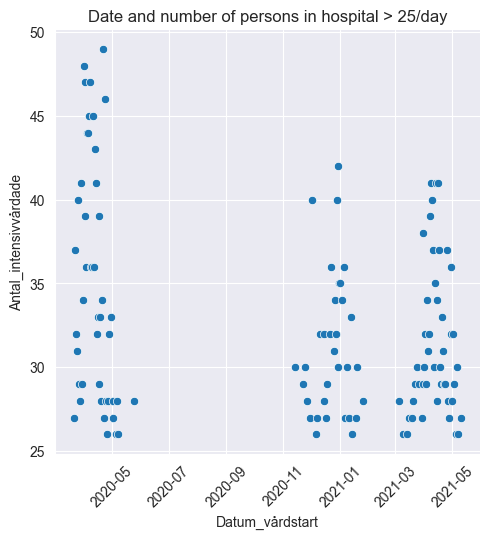

In [16]:
sns.set_style("darkgrid")
sns.relplot(data=over_25_cases, y="Antal_intensivvårdade", x="Datum_vårdstart").set(title='Date and number of persons in hospital > 25/day')
plt.xticks(rotation=45)
plt.show()

#plt.savefig("Visualiseringar/exercise_3.1_seaborn.png")

### Exercise 3.2 
#### (Analysis 2)

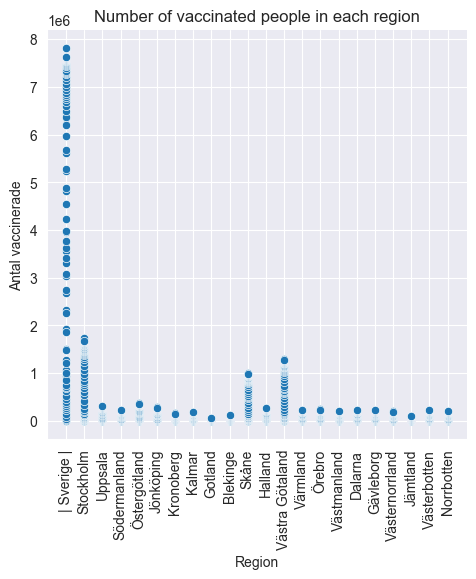

Vecka                            53
År                             2022
Region                        Skåne
Antal vaccinerade            985309
Andel vaccinerade          0.810923
Vaccinationsstatus    Minst 2 doser
dtype: object

In [149]:
covid19_vaccine_timeseries = pd.read_excel("../Labb_1_databehandling/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", "Vaccinerade tidsserie")

covid19_vaccine_timeseries.info()
covid19_vaccine_timeseries.head()
covid19_vaccine_timeseries.max()

stockholm_group = covid19_vaccine_timeseries.groupby("Region")
filtered_group_Stockholm = covid19_vaccine_timeseries.loc[stockholm_group.groups["Stockholm"]]
len(filtered_group_Stockholm)
filtered_group_Stockholm.query("Vaccinationsstatus == 'Minst 2 doser'").max()
filtered_group_Stockholm.query("Vaccinationsstatus == 'Minst 1 dos'").max()

västra_götalands_group = covid19_vaccine_timeseries.groupby("Region")
filtered_group_Västra_Götaland = covid19_vaccine_timeseries.loc[västra_götalands_group.groups["Västra Götaland"]]
filtered_group_Västra_Götaland.query("Vaccinationsstatus == 'Minst 2 doser'").max()
filtered_group_Västra_Götaland.query("Vaccinationsstatus == 'Minst 1 dos'").max()

skåne_group = covid19_vaccine_timeseries.groupby("Region")
filtered_group_Skåne = covid19_vaccine_timeseries.loc[skåne_group.groups["Skåne"]]
filtered_group_Skåne.query("Vaccinationsstatus == 'Minst 2 doser'").max()
filtered_group_Skåne.query("Vaccinationsstatus == 'Minst 1 dos'").max()


In [ ]:
sns.relplot(data=covid19_vaccine_timeseries, x="Region", y="Antal vaccinerade", sizes= (200,300)).set(title='Number of vaccinated people in each region')
plt.xticks(rotation=90)
plt.show()

#plt.savefig("Visualiseringar/exercise_3.2_seaborn.png")

#### **Initial datanalysis**

This dataset displays for example how many people that are vaccinated in each region and in which week. 

You can state following things on the overview of the data: 
- The plot shows the number of vaccinations in each region in the dataset. It shows that the three regions with most vaccinated people are Stockholm, Västra Götaland and Skåne.

- The highest percentage that are vaccinated are in: 
Stockholm: 0.831199 (at least 1 dose), 0.801076 (at least 2 doses), 
Västra Götaland: 0.855077 (at least 1 dose) ,0.833601 (at least 2 doses), 
Skåne: 0.829346 (at least 1 dose), 0.810923 (at least 2 doses).

**Conclusion**

When you compare the highest percentage that are vaccinated in the three regions mentioned above, you can read that the numbers are similar. There is a pattern that people with at least 2 doses of vaccine are fewer than ones that only have taken one dose of vaccine, but the difference a quite smal. 

### Exercise 3.3 
#### (Analysis 3)

In [77]:
covid19_divided_sex = pd.read_excel("../Labb_1_databehandling/Folkhalsomyndigheten_Covid19.xlsx", "Totalt antal per kön")

covid19_divided_sex.info()

le = LabelEncoder()
covid19_divided_sex["Kön_nummer"] = le.fit_transform(covid19_divided_sex["Kön"])
covid19_divided_sex.drop(index=[2], inplace=True)

covid19_divided_sex


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Kön                           3 non-null      object
 1   Totalt_antal_fall             3 non-null      int64 
 2   Totalt_antal_intensivvårdade  3 non-null      int64 
 3   Totalt_antal_avlidna          3 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 228.0+ bytes


,Kön,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna,Kön_nummer
0,Man,1210098,6550,11279,1
1,Kvinna,1381189,2947,9273,0


In [80]:
fig3_3_1 = px.histogram(covid19_divided_sex, x="Kön_nummer", y="Totalt_antal_fall", title="Total number of cases in difference between sex")
fig3_3_1.update_xaxes(showticklabels=False)
fig3_3_1.update_layout(bargap=0.7, xaxis_title= "Sex (pink=Women, green=Men)", yaxis_title="Total numbers of cases")
fig3_3_1.update_traces(marker_color=['pink', 'green'])

fig3_3_1.write_html("Visualiseringar/exercise_3.3.1_plotly.html")
fig3_3_1

In [81]:
fig3_3_2 = px.histogram(covid19_divided_sex, x="Kön_nummer", y="Totalt_antal_intensivvårdade", title="Total number of people in the intensive unit care in difference between sex")
fig3_3_2.update_xaxes(showticklabels=False)
fig3_3_2.update_layout(bargap=0.7, xaxis_title= "Sex (purple=Women, blue=Men)", yaxis_title="Total number of people in the intensive unit care")
fig3_3_2.update_traces(marker_color=['purple','darkblue'])

fig3_3_2.write_html("Visualiseringar/exercise_3.3.2_plotly.html")
fig3_3_2


In [83]:
fig3_3_3 = px.histogram(covid19_divided_sex, x="Kön_nummer", y="Totalt_antal_avlidna", title="Total number of deceased in difference between sex")
fig3_3_3.update_xaxes(showticklabels=False)
fig3_3_3.update_layout(bargap=0.7, xaxis_title= "Sex (red=Women, grey=Men)", yaxis_title="Total numbers of deceased")
fig3_3_3.update_traces(marker_color=['darkred','grey'])

fig3_3_3.write_html("Visualiseringar/exercise_3.3.3_plotly.html")
fig3_3_3

#### **Initial datanalysis**

The dataset contains information about sex related to number of cases in covid, number of people cared for in the intensive care unit and the number of deceased people through covid.

**Conclusion**
The visualisation between the different comparisons shows that more men have died and being cared for in the intensive care unit then women, but there are more women than men that have been sick in covid19.
